<a href="https://colab.research.google.com/github/JuliaCherep/innopolis/blob/Test1/%D0%94%D0%9710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача**: В школе учаться 2 класса, класс А учится по программе Буковки, а класс Б по программе Зайчики, нужно определить какая программа эффективнее.


 **Гипотеза**:\
 H0: p(a)=p(b)\
          H1: p(a)<>p(b)\
          α = 0,05



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 


In [ ]:
df=pd.read_csv('ad.csv')
df

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1
...,...,...
1995,A,0
1996,A,0
1997,A,0
1998,A,1


**Описание:** \
А-программа Буковки\
В-программа Зайчики \
**Активность:** \
1-успешное выполнение задания \
0-задание не выполнено


 








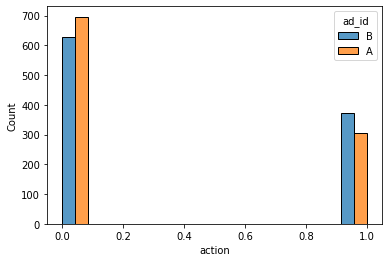

In [ ]:
sns.histplot(data=df, x="action", hue="ad_id", multiple="dodge") #['layer', 'stack', 'fill', 'dodge'], but  was passed.`

In [ ]:
click_df=df.pivot_table(values='action', index = 'ad_id', aggfunc=np.sum)
click_df['total']=df.pivot_table(values='action', index = 'ad_id', aggfunc=lambda x:len(x))
click_df['convers']=df.pivot_table(values='action', index = 'ad_id')
click_df['std_otklon']=df.pivot_table(values='action', index = 'ad_id', aggfunc=lambda x:np.std(x,ddof=0))
click_df['st_er']=df.pivot_table(values='action', index = 'ad_id', aggfunc=lambda x:stats.sem(x,ddof=0))
click_df

,action,total,convers,std_otklon,st_er
ad_id,,,,,
A,304,1000,0.304,0.459983,0.014546
B,372,1000,0.372,0.483338,0.015285


Text(0, 0.5, 'Коэф-т конверсии')

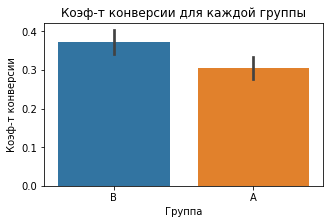

In [ ]:
plt.figure(figsize=(5,3))

sns.barplot(x=df['ad_id'], y=df['action'])

plt.title('Коэф-т конверсии для каждой группы')
plt.xlabel('Группа')
plt.ylabel('Коэф-т конверсии')

In [ ]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [ ]:
bukov_control=df[df['ad_id']=='A']['action']
zaiki_control=df[df['ad_id']=='B']['action']


In [ ]:
numbs=[bukov_control.count(),zaiki_control.count()]
resalt_oc=[bukov_control.sum(), zaiki_control.sum()]
print(resalt_oc)
           

[304, 372]


In [ ]:
z_stat,pval=proportions_ztest(resalt_oc, numbs)
print('z statistic:', z_stat)
print('p-value:', pval)

z statistic: -3.2144492244084213
p-value: 0.0013069502732125403


In [ ]:
alpha=0.05
print(pval<alpha)

True


In [ ]:
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(resalt_oc, numbs, alpha)

print('Доверительный интервал для класса A:', lower_con, ' - ', upper_con)
print('Доверительный интервал для класса B:', lower_test, ' - ', upper_test)

Доверительный интервал для класса A: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал для класса B: 0.3420429266473629  -  0.4019570733526371


**Выводы:**


1.   Нулевая гипотеза отменяется из-за того, что pval<0.05, программы обучения значимо различаются.
2.   Программа обучения Зайки эффективнее Буковки.

